In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
 
os.chdir("/Users/macbookpro/DataStudy/CustomerChurn/Codes")
churndata = pd.read_csv("BankChurners.csv")
churndata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
########################################################
# 1. EDA Phase  ########################################
########################################################

churndata.dtypes

CategoricalVar=["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]
NumericalVar =["CLIENTNUM","Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count",
               "Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal",
               "Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1",
               "Avg_Utilization_Ratio"]

churndata=churndata.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],
                axis=1)

for i in CategoricalVar:
    unique=churndata[i].value_counts()
    print(unique)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [4]:
        ## The number of categorical class is feasible
        ## The frequency of data in each class is fair
        ## However, maybe Income_Category is not equally distributed.

churndata[NumericalVar].describe().T
churndata.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [5]:
       
        ## There is no missing value
churn_numeric=churndata[NumericalVar]
 
def my_normalize(df):
    norm_df=((df-df.min())/(df.max()-df.min()))
    return norm_df

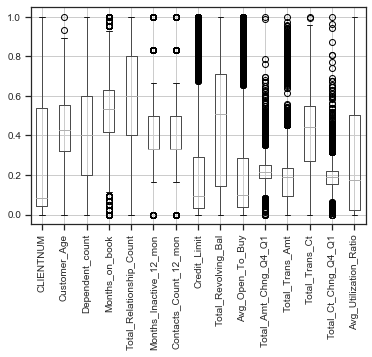

In [6]:
hurndataNormalised=my_normalize(churn_numeric)
churndataNormalised["Gender"]=churndata["Gender"]
churndataNormalised.boxplot(rot=90, fontsize=10)

            # Customer Age,Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon,
            # Total_Amt_Chng_Q4_Q1, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1 has outliers..

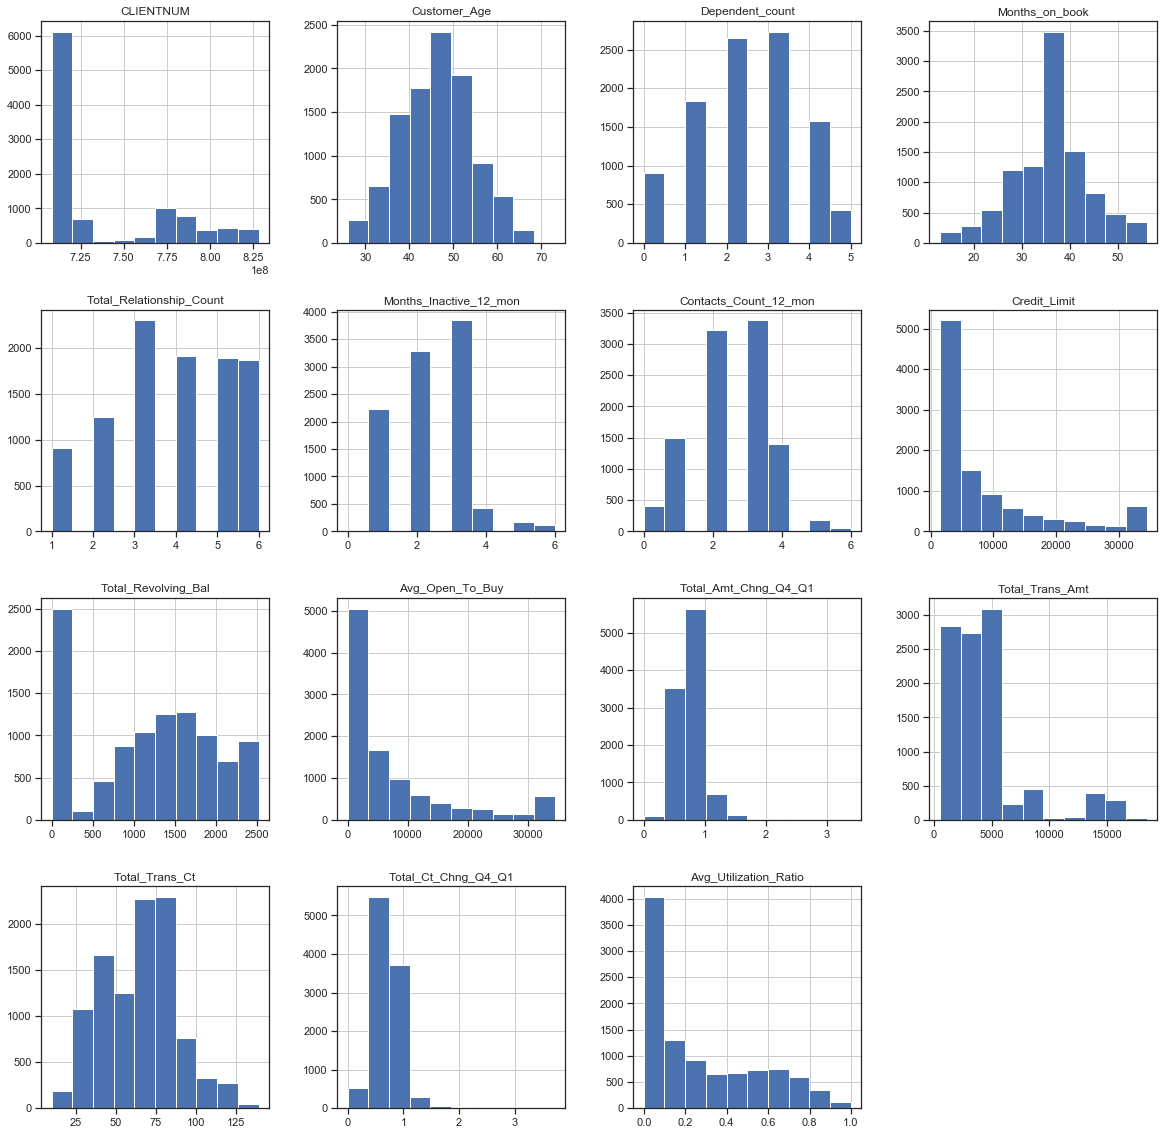

In [7]:
churn_numeric.hist(figsize=(20,20))
            
Quantiles=churn_numeric.quantile(q=0.9)

out_df=churndata[churndata["Customer_Age"]<=Quantiles.Customer_Age]
out_df=out_df[out_df["Credit_Limit"]<=Quantiles.Credit_Limit]
out_df=out_df[out_df["Avg_Open_To_Buy"]<=Quantiles.Avg_Open_To_Buy]
churndata_without_outlier=out_df[out_df["Total_Trans_Amt"]<=Quantiles.Total_Trans_Amt]
del out_df
my_normalize(churndata_without_outlier[NumericalVar]).boxplot(NumericalVar,rot=90, fontsize=10)

## In here we can see that there are also some outliers below the quantiles.
## However, other values are within a limited range. Therefore, lets use like in this way.

In [8]:
corrMatrix = churndata_without_outlier[NumericalVar].corr()
#sn.heatmap(corrMatrix, annot=False)
#plt.show()

## Below there is a correlation extractor function.
def ExtractCorr(data,cor):
    colu=data.columns
    for col in colu:
        Correlated=data[data[col]>cor][col]
        print(Correlated)
        
ExtractCorr(corrMatrix,0.85)

CLIENTNUM    1.0
Name: CLIENTNUM, dtype: float64
Customer_Age    1.0
Name: Customer_Age, dtype: float64
Dependent_count    1.0
Name: Dependent_count, dtype: float64
Months_on_book    1.0
Name: Months_on_book, dtype: float64
Total_Relationship_Count    1.0
Name: Total_Relationship_Count, dtype: float64
Months_Inactive_12_mon    1.0
Name: Months_Inactive_12_mon, dtype: float64
Contacts_Count_12_mon    1.0
Name: Contacts_Count_12_mon, dtype: float64
Credit_Limit       1.000000
Avg_Open_To_Buy    0.986728
Name: Credit_Limit, dtype: float64
Total_Revolving_Bal    1.0
Name: Total_Revolving_Bal, dtype: float64
Credit_Limit       0.986728
Avg_Open_To_Buy    1.000000
Name: Avg_Open_To_Buy, dtype: float64
Total_Amt_Chng_Q4_Q1    1.0
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
Total_Trans_Amt    1.0
Name: Total_Trans_Amt, dtype: float64
Total_Trans_Ct    1.0
Name: Total_Trans_Ct, dtype: float64
Total_Ct_Chng_Q4_Q1    1.0
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
Avg_Utilization_Ratio    1.0
Name: 

In [9]:
### Corelation
#Credit_Limit       1.000000
#Avg_Open_To_Buy    0.986728
## Therefore we can exclude Avg_Open_To_Buy from our dataset


churndata1=churndata_without_outlier
churndata1= churndata1.drop(["Avg_Open_To_Buy","CLIENTNUM"], axis=1)
NumericalVar =["Customer_Age","Dependent_count","Months_on_book","Total_Relationship_Count",
               "Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal",
               "Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1",
               "Avg_Utilization_Ratio"]


# Log transforming skew variables
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = churndata1[NumericalVar].skew()

skew_cols = (skew_vals
.sort_values(ascending=False)
.to_frame()
.rename(columns={0:'Skew'})
.query('abs(Skew) > {}'.format(skew_limit)))

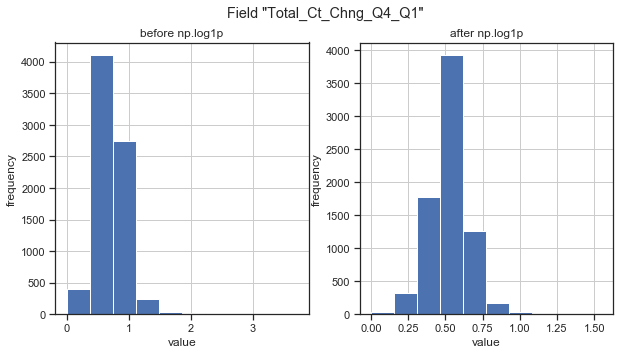

In [10]:
## We have 4 variables skewed more than 0.75.
## This situation actually seen in hist plot also.

field = "Total_Ct_Chng_Q4_Q1"

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

churndata1[field].hist(ax=ax_before)
churndata1[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

for col in skew_cols.index.values:
    if col == "CLIENTNUM":
        continue 
    churndata1[col]=churndata1[col].apply(np.log1p)

In [11]:
### Log transformation has been completed lets look hist aganin

churndata1[NumericalVar].skew()
### There is no skewed variables more than 0.75.
## Lets continue

Customer_Age               -0.372144
Dependent_count            -0.061802
Months_on_book             -0.464436
Total_Relationship_Count   -0.262134
Months_Inactive_12_mon      0.631169
Contacts_Count_12_mon      -0.029237
Credit_Limit                0.435752
Total_Revolving_Bal        -0.112853
Total_Amt_Chng_Q4_Q1        0.685622
Total_Trans_Amt             0.470558
Total_Trans_Ct             -0.319002
Total_Ct_Chng_Q4_Q1         0.511417
Avg_Utilization_Ratio       0.511770
dtype: float64

In [12]:
sn.set_theme(style="ticks")
Corrplot=churndata[NumericalVar].sample(frac=0.5, replace=True, random_state=1)
Corrplot["Attrition_Flag"]=churndata["Attrition_Flag"]

## sn.pairplot(Corrplot, hue="Attrition_Flag")


## Let add some new features that can provide more d
## Credit_Limit and Avg_Utilization_Ratio
## Total_Trans_Amt and Total_Trans_Ct are non linear we can add interaction term among these
churndata1["Total_Trans_Amt_X_Total_Trans_Ct"]=churndata1["Total_Trans_Ct"]*churndata1["Total_Trans_Amt"]
churndata1["Credit_Limit_X_Avg_Utilization_Ratio"]=churndata1["Avg_Utilization_Ratio"]*churndata1["Credit_Limit"]

## New features from categories.

churndata2=churndata1.copy()

In [13]:
def add_deviation_feature(X, feature, category):
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviation_feature

add_deviation_feature(churndata2, 'Credit_Limit', 'Education_Level')
add_deviation_feature(churndata2, 'Total_Ct_Chng_Q4_Q1', 'Income_Category')

In [14]:
mask = churndata2.dtypes != np.object
float_cols = churndata2.columns[mask]

Corrplot=churndata2[float_cols].sample(frac=0.5, replace=True, random_state=1)
Corrplot["Attrition_Flag"]=churndata["Attrition_Flag"]
#sns_plot = sn.pairplot(Corrplot, hue="Attrition_Flag", height=6)
#sns_plot.savefig("Histogram_After_LogTransform.png")

In [15]:
## One-hot encoding the dummy variables:
churndata3=churndata2.copy()
churndata3 = pd.get_dummies(churndata3, columns=CategoricalVar, drop_first=True)
churndata3.describe().T

#churndata3.to_csv("ChurnData_Explored.csv")

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7561.0,4.499630e+01,6.992758,26.000000,40.000000,45.000000,50.000000,57.000000
Dependent_count,7561.0,2.482079e+00,1.229586,0.000000,2.000000,3.000000,3.000000,5.000000
Months_on_book,7561.0,3.483627e+01,7.199090,13.000000,31.000000,36.000000,39.000000,53.000000
Total_Relationship_Count,7561.0,3.984923e+00,1.484144,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,7561.0,2.347441e+00,1.011591,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,7561.0,2.458537e+00,1.108961,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,7561.0,8.362336e+00,0.765706,7.271912,7.757051,8.180321,8.970432,10.060149
Total_Revolving_Bal,7561.0,1.138906e+03,815.988224,0.000000,0.000000,1249.000000,1760.000000,2517.000000
Total_Amt_Chng_Q4_Q1,7561.0,5.554496e-01,0.119527,0.000000,0.484892,0.547543,0.617885,1.480922
Total_Trans_Amt,7561.0,3.462100e+03,1529.414017,510.000000,2132.000000,3710.000000,4515.000000,8211.000000


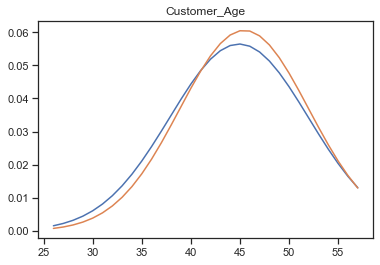

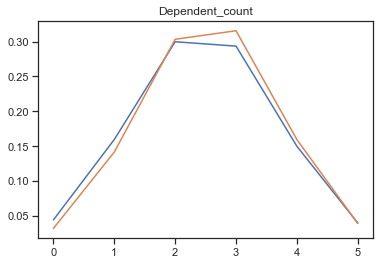

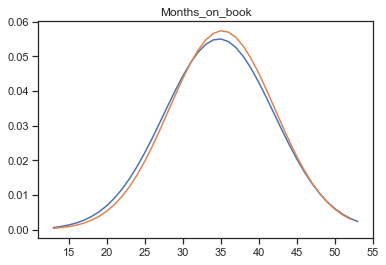

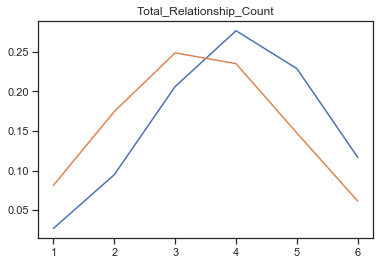

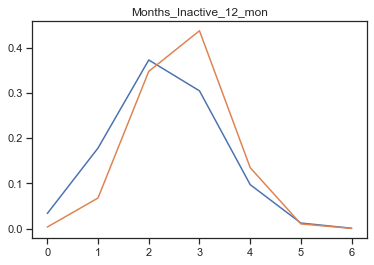

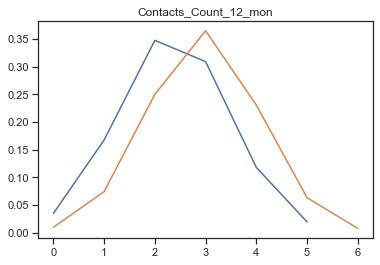

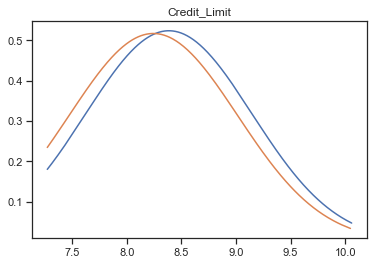

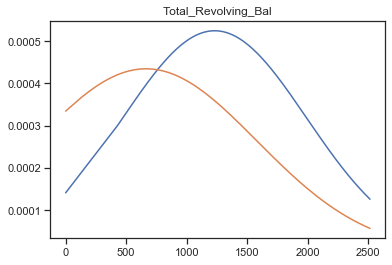

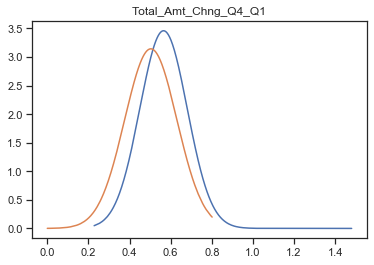

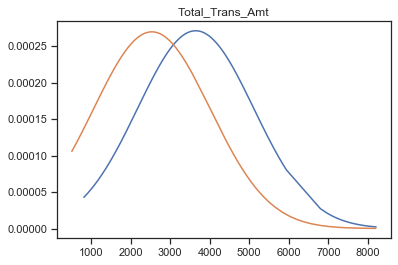

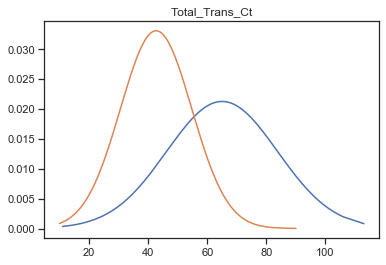

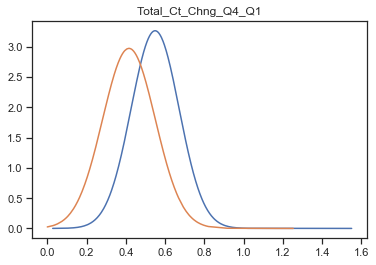

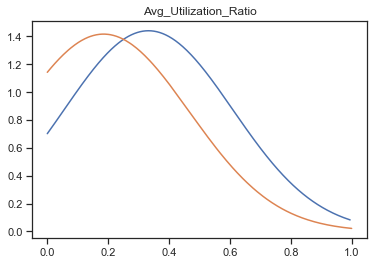

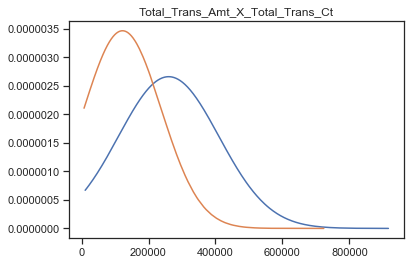

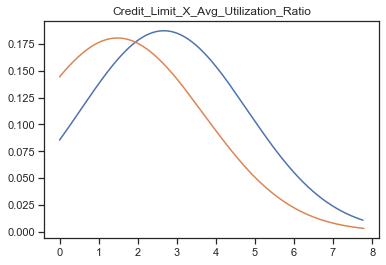

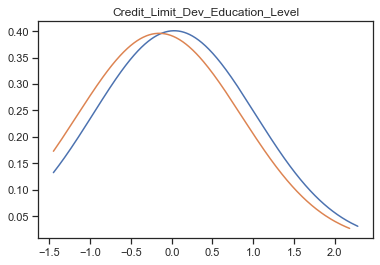

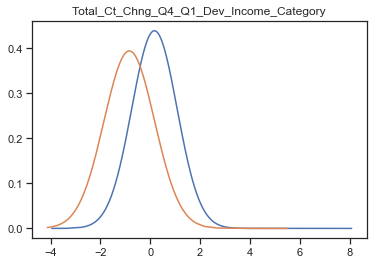

In [16]:
### Hypothesis Testing
### This kind of approach exactly clear our predictivity regarding variables.
### We plot probability density functions of featues by churning customer 
### in order to reveal if there is any difference by these features
from scipy.stats import binom
from scipy import stats 
import math

def plot_ppf(data,feature):
 
    mu1 = data[data["Attrition_Flag"]=="Existing Customer"][feature].mean()
    variance1 = data[data["Attrition_Flag"]=="Existing Customer"][feature].var()
    sigma1 = math.sqrt(variance1)
    x1 = data[data["Attrition_Flag"]=="Existing Customer"][feature].sort_values(ascending=False)
    plt.plot(x1,stats.norm.pdf(x1, mu1, sigma1))

    mu2 = data[data["Attrition_Flag"]=="Attrited Customer"][feature].mean()
    variance2 = data[data["Attrition_Flag"]=="Attrited Customer"][feature].var()
    sigma2 = math.sqrt(variance2)
    x2 = data[data["Attrition_Flag"]=="Attrited Customer"][feature].sort_values(ascending=False)
    plt.plot(x2,stats.norm.pdf(x2, mu2, sigma2))
    plt.title(feature)

    plt.show()
    
for col in float_cols:
        plot_ppf(churndata2,col)
        
# As we can see that normal distribution is satisfied in each feature.
# However, one of the most significant inference from pdf is the similarity of
# each functions by output value. This make our prediction hard.

In [17]:
#### Fitting the base data set

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

df_Without_EDA=pd.get_dummies(churndata, columns=CategoricalVar, drop_first=True)

def classification_knn(data,k):
    y, X = data['Attrition_Flag_Existing Customer'], data.drop(columns='Attrition_Flag_Existing Customer')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Preciision, recall, f-score from the multi-class support function
    print(classification_report(y_test, y_pred))
    print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
    print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

classification_knn(df_Without_EDA,4)

              precision    recall  f1-score   support

           0       0.18      0.14      0.16       661
           1       0.84      0.87      0.85      3390

    accuracy                           0.75      4051
   macro avg       0.51      0.51      0.51      4051
weighted avg       0.73      0.75      0.74      4051

Accuracy score:  0.75
F1 Score:  0.85


In [18]:
### Fitting the dataset after Examining
classification_knn(churndata3,4)

### The accuracy score increase from % 75 to % 89 after some EDA phases with simlee Knn Classification algorithm

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       501
           1       0.93      0.94      0.94      2524

    accuracy                           0.89      3025
   macro avg       0.81      0.80      0.80      3025
weighted avg       0.89      0.89      0.89      3025

Accuracy score:  0.89
F1 Score:  0.94
